In [ ]:
import tensorflow as tf
import keras
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_train[0].shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(32, 32, 3)


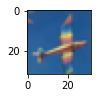

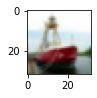

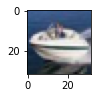

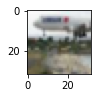

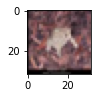

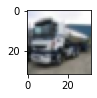

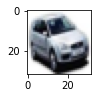

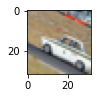

In [ ]:
for i in range(220,228):
  plt.subplot(120+1+i)
  img = x_train[i]
  plt.imshow(img)
  plt.show()


In [ ]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255
n=10
print(y_train.shape)
y_train = np_utils.to_categorical(y_train,n)
y_test = np_utils.to_categorical(y_test,n)
print(y_train.shape)

(50000, 1)
(50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3) , strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))

model.add(Conv2D(75, kernel_size=(3,3) , strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3) , strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy' , metrics=['accuracy'], optimizer='adam')

model.fit(x_train,y_train, batch_size=128, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
391/391 [==============================] - 556s 1s/step - loss: 1.8353 - accuracy: 0.3160 - val_loss: 1.1276 - val_accuracy: 0.5938
Epoch 2/10
391/391 [==============================] - 543s 1s/step - loss: 1.1542 - accuracy: 0.5929 - val_loss: 0.9197 - val_accuracy: 0.6770
Epoch 3/10
391/391 [==============================] - 544s 1s/step - loss: 0.9287 - accuracy: 0.6742 - val_loss: 0.8312 - val_accuracy: 0.7146
Epoch 4/10
391/391 [==============================] - 545s 1s/step - loss: 0.8026 - accuracy: 0.7172 - val_loss: 0.7697 - val_accuracy: 0.7351
Epoch 5/10
391/391 [==============================] - 548s 1s/step - loss: 0.7053 - accuracy: 0.7537 - val_loss: 0.7222 - val_accuracy: 0.7513
Epoch 6/10
391/391 [==============================] - 547s 1s/step - loss: 0.6198 - accuracy: 0.7807 - val_loss: 0.6941 - val_accuracy: 0.7649
Epoch 7/10
391/391 [==============================] - 547s 1s/step - loss: 0.5607 - accuracy: 0.8036 - val_loss: 0.6769 - val_accuracy: 0.7704

In [ ]:
classes = range(0,10)

names = ['airplane' , 'automobile', 'bird' ,'cat','deer','dog','frog','horse','ship','truck']
classes_labels=dict(zip(classes,names))

batch=x_test[110:119]
labels=np.argmax(y_test[100:109],axis=-1)

predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 45ms/step


In [ ]:
print(predictions)

[[1.75917099e-04 4.70632440e-05 2.63866782e-02 2.89944932e-02
  8.38491619e-01 6.64025843e-02 1.22508258e-02 2.68358942e-02
  1.13379327e-04 3.01500491e-04]
 [9.91611540e-01 3.11584394e-08 8.13271012e-03 1.23389027e-05
  1.19008689e-06 8.49070059e-09 1.15245884e-08 9.28214305e-09
  2.42256647e-04 4.92723595e-09]
 [9.01053427e-04 2.58344044e-05 2.21019343e-01 1.36642565e-03
  3.73885920e-03 9.31963077e-05 7.72326231e-01 4.11259407e-06
  5.18371642e-04 6.58066210e-06]
 [5.15326883e-06 3.65950861e-08 9.78048801e-01 4.15005069e-03
  8.14914674e-05 1.11710408e-03 1.65736508e-02 1.20364648e-05
  1.14747645e-05 3.27918144e-07]
 [1.54990979e-04 3.84308666e-01 2.01527582e-05 5.48883363e-05
  2.82374322e-06 3.89606175e-05 2.79668493e-05 2.96072703e-05
  9.15362834e-05 6.15270436e-01]
 [8.02497659e-03 6.38955680e-04 1.56744719e-02 5.93604624e-01
  1.78966925e-01 1.66586414e-01 9.37559735e-03 2.00591907e-02
  1.65828399e-03 5.41062793e-03]
 [9.61100578e-01 2.06583923e-08 3.55980285e-02 4.07044827e

In [ ]:
for image in predictions:
  print(np.sum(image))

0.99999994
1.0000001
0.99999994
1.0000001
1.0
1.0000001
1.0
1.0
0.9999999


In [ ]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 0 6 2 9 3 0 4 6]


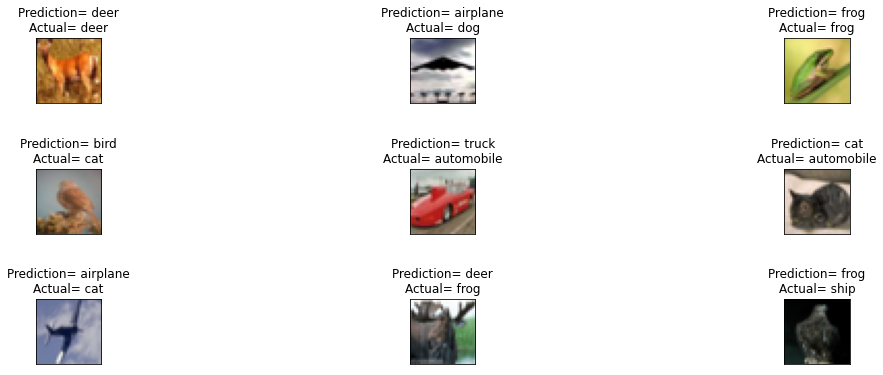

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate(batch):
  for key,value in classes_labels.items():
    if class_result[i]==key:
      title= 'Prediction= {}\nActual= {}'. format(classes_labels[key],classes_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  axs[i].imshow(img)

plt.show()